# SMS SPAM CLASSIFICATION

## [Database source](https://archive.ics.uci.edu/dataset/228/sms+spam+collection)

In [220]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [221]:
df = pd.read_csv("SMSSpamCollection", sep='\t', names=['class', 'text'])

In [222]:
df

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [223]:
print(f"Rows: {df.shape[0]}")

Rows: 5572


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [225]:
print(f'Total null values:\n{df.isnull().sum()}')
print(f'\nDuplicated values:\n{df.duplicated().sum()}')

Total null values:
class    0
text     0
dtype: int64

Duplicated values:
403


In [226]:
# Drop duplicates
df = df.drop_duplicates()

In [227]:
print(f'\nDuplicated values:\n{df.duplicated().sum()}')
print(f"Rows:\n{df.shape[0]}")


Duplicated values:
0
Rows:
5169


In [228]:
df.describe()

,class,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


<Axes: title={'center': 'class values ratio'}, ylabel='count'>

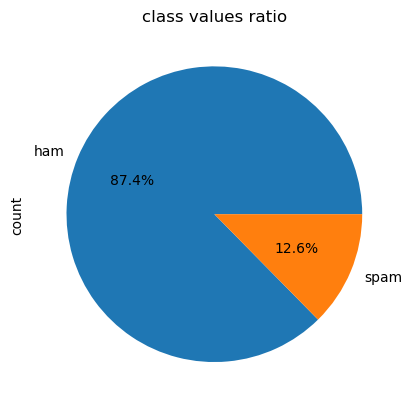

In [229]:
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='class values ratio')

In [230]:
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [231]:
# Lets prepare the data
translator = str.maketrans('','', string.punctuation)
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda text: str(text).translate(translator).lower())
df['text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: text, Length: 5169, dtype: object

In [232]:
df.loc[:,'class'] = df.loc[:, 'class'].replace(['ham', 'spam'], [-1, 1])
# 1 => spam; -1 => ham
df = df.astype({"class" : 'int8'})
df.info()
df['class']

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5169 non-null   int8  
 1   text    5169 non-null   object
dtypes: int8(1), object(1)
memory usage: 85.8+ KB


0      -1
1      -1
2       1
3      -1
4      -1
       ..
5567    1
5568   -1
5569   -1
5570   -1
5571   -1
Name: class, Length: 5169, dtype: int8

In [244]:
vectorizer = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=17)

In [243]:
X_train

3031    also sir i sent you an email about how to log ...
4211    no dahe is stupid daalways sending like thisdo...
2581    u are subscribed to the best mobile content se...
798     petey boy whereare you me and all your friends...
2893    babe you said 2 hours and its been almost 4  i...
                              ...                        
2942    my supervisor find 4 me one lor i thk his stud...
1377             auntie huai juan never pick up her phone
413     okies ill go yan jiu too we can skip ard oso g...
2281                            r ü comin back for dinner
2801    housemaid is the murderer coz the man was murd...
Name: text, Length: 3618, dtype: object

In [245]:
print(y_train)
# y_train_new_index = y_train.reset_index()['class']

3031   -1
4211   -1
2581    1
798    -1
2893   -1
       ..
2942   -1
1377   -1
413    -1
2281   -1
2801   -1
Name: class, Length: 3618, dtype: int8


In [246]:
X_train = vectorizer.fit_transform(X_train.astype('U'))
X_test = vectorizer.transform(X_test.astype('U'))

In [247]:
print(X_train[0])

  (0, 868)	1
  (0, 5992)	1
  (0, 5838)	1
  (0, 7542)	2
  (0, 894)	1
  (0, 2452)	1
  (0, 705)	1
  (0, 3381)	2
  (0, 6740)	1
  (0, 4039)	1
  (0, 3574)	1
  (0, 6615)	1
  (0, 7008)	1
  (0, 4980)	1
  (0, 5163)	1
  (0, 3478)	1
  (0, 5831)	1
  (0, 916)	1
  (0, 4316)	1
  (0, 6609)	1
  (0, 5937)	1
  (0, 2589)	1
  (0, 6652)	1
  (0, 982)	1
  (0, 1131)	1
  (0, 3337)	1
  (0, 3199)	1
  (0, 3088)	1
  (0, 7228)	1


In [248]:
model = LogisticRegression(max_iter=100, verbose=1, n_jobs=4)
model.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(n_jobs=4, verbose=1)

In [249]:
y_pred = model.predict(X_test)
print(f'Model accuracy: {sum([1 for x, y in zip(y_pred, y_test) if x == y]) / X_test.shape[0]}')

Model accuracy: 0.9819471308833011


In [250]:
# Words connected with spam
print(model.coef_)
N_words = 12
top_spam_index = np.argpartition(model.coef_[0], -N_words)[-N_words:]

top_spam_words = vectorizer.get_feature_names_out()[top_spam_index]

print(f'\nTop {N_words} words connected to spam:\n{top_spam_words}')

[[ 0.14621164  0.33208664  0.00194342 ... -0.00077729  0.26702066
  -0.00879008]]

Top 12 words connected to spam:
['mobile' 'free' 'text' 'real' 'ringtone' 'txt' 'message' 'won' 'stop'
 'chat' 'call' 'reply']


In [251]:
result = model.predict_proba(X_test)
result

array([[9.10735591e-01, 8.92644086e-02],
       [9.98128565e-01, 1.87143462e-03],
       [9.84199723e-01, 1.58002767e-02],
       ...,
       [9.98501912e-01, 1.49808776e-03],
       [9.83221559e-01, 1.67784409e-02],
       [9.99309673e-01, 6.90326542e-04]])

In [269]:
N_spamSms = 6
spam_prob = result[:,1]

y_test_index = y_test.reset_index()
spam_messages_id = y_test_index['index'][np.argpartition(spam_prob, -N_spamSms)[-N_spamSms:]]
spam_messages = df.loc[spam_messages_id,'text']

print("Messages with the highest probability to be a spam:\n")
for spam in np.array(spam_messages):
    print(f'\n{spam}')

Messages with the highest probability to be a spam:


we tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow

free unlimited hardcore porn direct 2 your mobile txt porn to 69200  get free access for 24 hrs then chrgd50p per day txt stop 2exit this msg is free

married local women looking for discreet action now 5 real matches instantly to your phone text match to 69969 msg cost 150p 2 stop txt stop bcmsfwc1n3xx

we tried to call you re your reply to our sms for a video mobile 750 mins unlimited text  free camcorder reply of call 08000930705 now

free ringtone text first to 87131 for a poly or text get to 87131 for a true tone help 0845 2814032 16 after 1st free tones are 3x£150pw to e£nd txt stop

you have won a guaranteed £1000 cash or a £2000 prize to claim yr prize call our customer service representative on 08714712412 between 10am7pm cost 10p


In [309]:
spam_words = ['won', 'win', 'free', 'claim', 'access', 'call', 'received', 'porn', 'local', 'text', 'txt', 'apply', 'award', 'awarded', 'congrats', 'congratulations', 'winner', 'important', 'urgent', 'reply', 'rply', 'contact']

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=17)

simplified_vectorizer = CountVectorizer(vocabulary=spam_words)
X_train = simplified_vectorizer.fit_transform(X_train.astype('U'))
X_test = simplified_vectorizer.transform(X_test.astype('U'))

X_train

<3618x22 sparse matrix of type '<class 'numpy.int64'>'
	with 1035 stored elements in Compressed Sparse Row format>

In [310]:
simple_model = LogisticRegression(max_iter=100, verbose=1, n_jobs=4)
simple_model.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(n_jobs=4, verbose=1)

In [311]:
y_pred = simple_model.predict(X_test)
print(f'Model accuracy: {sum([1 for x, y in zip(y_pred, y_test) if x == y]) / X_test.shape[0]}')

Model accuracy: 0.9439071566731141


In [312]:
# spam words
for name, weight in zip(spam_words, simple_model.coef_[0]):
    print(f'{name}\t\t\t : \t\t\t {weight}')

won			 : 			 2.0330568260060162
win			 : 			 2.1862450205660204
free			 : 			 2.005520709870025
claim			 : 			 2.95829783886677
access			 : 			 0.7486640253153616
call			 : 			 2.389946447972013
received			 : 			 0.7736044934563674
porn			 : 			 0.06385604619416421
local			 : 			 1.0510253767097568
text			 : 			 2.02835909178368
txt			 : 			 3.883077393500616
apply			 : 			 1.719753670984005
award			 : 			 1.1766603445785468
awarded			 : 			 1.4089096413958868
congrats			 : 			 0.5999765387045786
congratulations			 : 			 0.15125010984367998
winner			 : 			 1.423192528827322
important			 : 			 1.3407776080079141
urgent			 : 			 2.493976148632724
reply			 : 			 2.313365394846526
rply			 : 			 1.9519033338139646
contact			 : 			 1.899499117633675


## As a result, it is not that hard to identify spam messages, because majority of them are connected with either winning something, getting it for free or any sort of porn/sexual contacts.